In [78]:
%pylab inline
import netCDF4 as nc
import cartopy.crs as ccrs

Populating the interactive namespace from numpy and matplotlib


In [125]:
data_names = ['tas_Amon_ACCESS1-0_historical_r1i1p1_185001-200512.nc',
    'tas_Amon_bcc-csm1-1_historical_r1i1p1_185001-201212.nc',
    'tas_Amon_BNU-ESM_historical_r1i1p1_185001-200512.nc',
    'tas_Amon_CanESM2_historical_r1i1p1_185001-200512.nc',
    'tas_Amon_CCSM4_historical_r1i1p1_185001-200512.nc',
    'tas_Amon_CESM1-CAM5_historical_r1i1p1_185001-200512.nc',
    'tas_Amon_FIO-ESM_historical_r1i1p1_185001-200512.nc',
    'tas_Amon_inmcm4_historical_r1i1p1_185001-200512.nc',
    'tas_Amon_MIROC-ESM-CHEM_historical_r1i1p1_185001-200512.nc',
    'tas_Amon_MIROC5_historical_r1i1p1_185001-201212.nc'
    'tas_Amon_NorESM1-M_historical_r1i1p1_185001-200512.nc']

In [129]:
def grid_areas(ds):
    lats = ds.variables['lat'][:]
    res = 180/ds.variables['lat'].shape[0]

    def sin_d(degrees):
        return np.sin(degrees / 180 * np.pi)

    s = (sin_d(lats + (res / 2)) - sin_d(lats - (res / 2))) / 2
    s[0] = 1 -  sin_d(90 - (res / 2))
    s[-1] = 1 - sin_d(90 - res / 2)
    areas = np.zeros([ds.variables['lat'].shape[0], ds.variables['lon'].shape[0]])
    for i in range(ds.variables['lon'].shape[0]):
        areas[:, i] = s / ds.variables['lon'].shape[0]
        
    return areas

In [151]:
for i in range(1):# range(len(data_names)):
    filename = '/Users/g/Documents/CMIP5/'+ data_names[i]
    ds = nc.Dataset(filename) 
    
    temp_time = np.sum(ds['tas'][:,:,:] * grid_areas(ds), axis=(1,2))
    

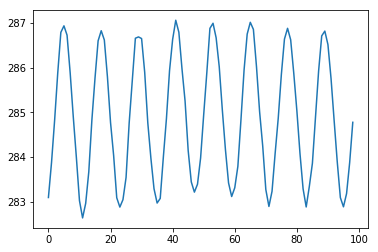

In [149]:
plt.plot(temp_time[1:100])

In [110]:
ds.variables.keys()

odict_keys(['time', 'time_bnds', 'lat', 'lat_bnds', 'lon', 'lon_bnds', 'height', 'tas'])

In [111]:
ds.variables['tas']

<class 'netCDF4._netCDF4.Variable'>
float32 tas(time, lat, lon)
    standard_name: air_temperature
    long_name: Near-Surface Air Temperature
    units: K
    original_name: ST
    cell_methods: time: mean (interval: 15 minutes)
    cell_measures: area: areacella
    history: 2011-03-16T18:49:59Z altered by CMOR: Treated scalar dimension: 'height'. 2011-03-16T18:49:59Z altered by CMOR: replaced missing value flag (1e+38) with standard missing value (1e+20).
    coordinates: height
    missing_value: 1e+20
    _FillValue: 1e+20
    associated_files: baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation gridspecFile: gridspec_atmos_fx_CanESM2_historical_r0i0p0.nc areacella: areacella_fx_CanESM2_historical_r0i0p0.nc
unlimited dimensions: time
current shape = (1872, 64, 128)
filling on

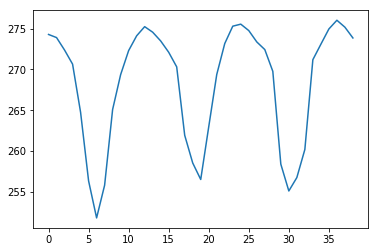

In [113]:
plt.plot(ds['tas'][1:40,10,10])

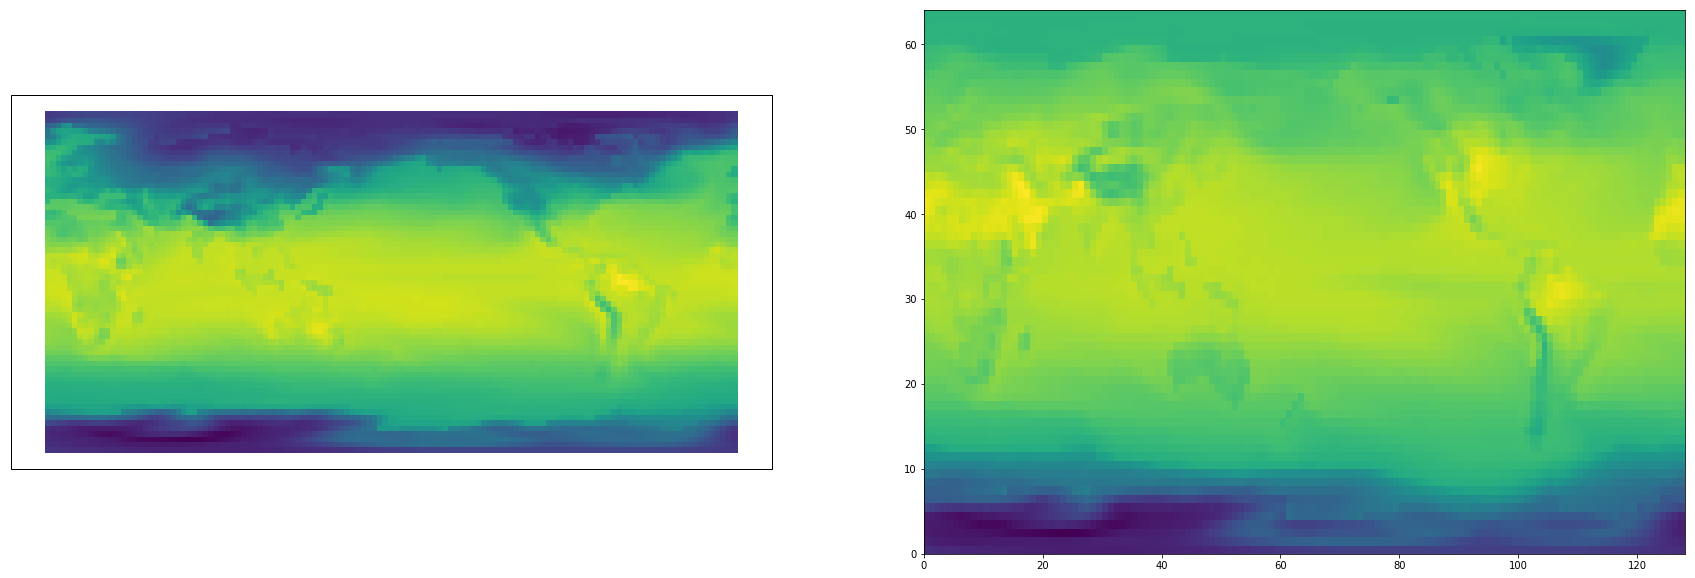

In [114]:
fig = plt.figure(figsize=(30,10))

ax1 = fig.add_subplot(121, projection= ccrs.NearsidePerspective())
ax1.pcolormesh(ds['lon'], ds['lat'], ds['tas'][1,:,:], transform= ccrs.NearsidePerspective())

ax2 = fig.add_subplot(122)
ax2.pcolormesh(ds['tas'][7,:,:])


In [115]:
simple_mean = np.mean(ds['tas'][1,:,:])
simple_mean

274.2814025878906

To calculate the area of a grid cell:

If `res` is the width of a strip at some latitude (i.e. 180 / the number of latitude grid cells)...

In [116]:
lats = ds.variables['lat'][:]
res = 180/ds.variables['lat'].shape[0]

def sin_d(degrees):
    return np.sin(degrees / 180 * np.pi)

s = (sin_d(lats + (res / 2)) - sin_d(lats - (res / 2))) / 2
s[0] = 1 -  sin_d(90 - (res / 2))
s[-1] = 1 - sin_d(90 - res / 2)
areas = np.zeros([ds.variables['lat'].shape[0], ds.variables['lon'].shape[0]])
for i in range(ds.variables['lon'].shape[0]):
    areas[:, i] = s / ds.variables['lon'].shape[0]

In [117]:
ds.variables['lon'].shape[0]

128